In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
# files.download('/content/data.txt')

Mounted at /content/drive


## 09-03 

### Train Word2Vec, TED

In [ ]:
import re
import urllib.request
import zipfile
from lxml import etree
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

data = open('ted_en-20160408.xml', 'r', encoding='UTF8')
data = etree.parse(data)
# Only the stuff between <content> and </content>.
data = '\n'.join(data.xpath('//content/text()'))

# Remove things like (Audio) and (Laughter).
data = re.sub(r'\([^)]*\)', '', data)
# r'': raw string
# \(: match a opening parenthesis
# [^)]*: match zero or more characters that are not a closing parenthesis
# \): match a closing parenthesis

In [ ]:
len(data)

24062319

In [ ]:
data[:200]

"Here are two reasons companies fail: they only do more of the same, or they only do what's new.\nTo me the real, real solution to quality growth is figuring out the balance between two activities: expl"

In [ ]:
sentence_tokenized = sent_tokenize(data)

57 min (???)

In [ ]:
len(sentence_tokenized)

273380

In [ ]:
sentence_tokenized[:2]

["Here are two reasons companies fail: they only do more of the same, or they only do what's new.",
 'To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation.']

In [ ]:
normalized = []
for sentence in sentence_tokenized:
     sentence = re.sub(r"[^a-z0-9]+", " ", sentence.lower())
     normalized.append(sentence)

In [ ]:
word_tokenized = [word_tokenize(sentence) for sentence in normalized]

26 sec

In [ ]:
len(word_tokenized)

273380

In [ ]:
word_tokenized[:2]

[['here',
  'are',
  'two',
  'reasons',
  'companies',
  'fail',
  'they',
  'only',
  'do',
  'more',
  'of',
  'the',
  'same',
  'or',
  'they',
  'only',
  'do',
  'what',
  's',
  'new'],
 ['to',
  'me',
  'the',
  'real',
  'real',
  'solution',
  'to',
  'quality',
  'growth',
  'is',
  'figuring',
  'out',
  'the',
  'balance',
  'between',
  'two',
  'activities',
  'exploration',
  'and',
  'exploitation']]

In [ ]:
import pickle

In [ ]:
with open('/content/0903_ted_tokenized.pkl', 'wb') as f:
    pickle.dump(word_tokenized, f, -1)

In [ ]:
files.download('/content/0903_ted_tokenized.pkl')

In [ ]:
with open('/content/drive/MyDrive/ColabFiles/yoonlp/0903_ted_tokenized.pkl', 'rb') as f:
    word_tokenized = pickle.load(f)

In [ ]:
len(word_tokenized)

273380

In [ ]:
word_tokenized[:2]

[['here',
  'are',
  'two',
  'reasons',
  'companies',
  'fail',
  'they',
  'only',
  'do',
  'more',
  'of',
  'the',
  'same',
  'or',
  'they',
  'only',
  'do',
  'what',
  's',
  'new'],
 ['to',
  'me',
  'the',
  'real',
  'real',
  'solution',
  'to',
  'quality',
  'growth',
  'is',
  'figuring',
  'out',
  'the',
  'balance',
  'between',
  'two',
  'activities',
  'exploration',
  'and',
  'exploitation']]

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# Train Word2Vec
w2v_ted_model = Word2Vec(sentences=word_tokenized, 
                         vector_size=100, # embedding vector dim
                         window=5, 
                         min_count=5, # min word count
                         workers=4, 
                         sg=0) # 0 for CBOW, 1 for skip-gram

11 sec

In [ ]:
w2v_ted_model.wv.vectors.shape

(21613, 100)

In [ ]:
w2v_ted_model.wv["man"]

array([ 4.09049094e-01, -2.51959252e+00,  7.87622407e-02, -1.03376508e+00,
        2.31687522e+00, -2.15019941e-01, -3.17499459e-01,  1.43135524e+00,
       -5.90614378e-01, -4.04853076e-01, -2.94293225e-01, -6.95986927e-01,
       -1.12780535e+00,  6.45172954e-01,  3.80587935e-01, -7.80788839e-01,
        3.78865927e-01, -1.24055648e+00,  4.55598116e-01, -1.11039412e+00,
        4.07578647e-01,  7.85926759e-01, -1.27382025e-01, -2.13500530e-01,
        1.19169462e+00,  2.18271464e-01, -2.13590813e+00, -5.47833264e-01,
        3.42664897e-01, -1.81370378e+00,  1.55311991e-02,  6.34031892e-01,
        6.22894526e-01, -1.09990552e-01, -9.28914309e-01, -4.58191723e-01,
       -8.72363746e-01, -1.31176984e+00, -1.69323111e+00, -9.36373413e-01,
        4.27197874e-01, -8.06003153e-01, -1.01652592e-01,  1.76757550e+00,
        6.74858391e-01,  2.21318379e-01, -2.13866496e+00, -1.49597812e+00,
       -1.42621553e+00, -8.55736017e-01,  2.91516602e-01, -2.39037800e+00,
       -5.17280519e-01,  

In [ ]:
w2v_ted_model.wv.most_similar("man")

[('woman', 0.8573907017707825),
 ('guy', 0.8115547895431519),
 ('lady', 0.7796860933303833),
 ('boy', 0.750478982925415),
 ('girl', 0.7410148978233337),
 ('gentleman', 0.7282958030700684),
 ('soldier', 0.7024497985839844),
 ('poet', 0.6949542164802551),
 ('kid', 0.6856720447540283),
 ('son', 0.6545511484146118)]

In [ ]:
w2v_ted_model.wv.save_word2vec_format("w2v_ted_model") # save
w2v_ted_loaded = KeyedVectors.load_word2vec_format("w2v_ted_model") # load

In [ ]:
w2v_ted_loaded.most_similar("man")

[('woman', 0.8573907017707825),
 ('guy', 0.8115547895431519),
 ('lady', 0.7796860933303833),
 ('boy', 0.750478982925415),
 ('girl', 0.7410148978233337),
 ('gentleman', 0.7282958030700684),
 ('soldier', 0.7024497985839844),
 ('poet', 0.6949542164802551),
 ('kid', 0.6856720447540283),
 ('son', 0.6545511484146118)]

### Train Word2Vec, 네이버영화

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 47.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm 

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="naver_movie.txt")

data = pd.read_table('naver_movie.txt')
data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
len(data)

200000

In [ ]:
data.isnull().values.any()

True

In [ ]:
data = data.dropna(how='any')
data.isnull().values.any()

False

In [ ]:
len(data)

199992

In [ ]:
data['document'] = data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True)
data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

okt = Okt()

tokenized = []
for sentence in tqdm(data['document']):
    sentence = okt.morphs(sentence, stem=True)
    sentence = [word for word in sentence if not word in stopwords]
    tokenized.append(sentence)

100%|██████████| 199992/199992 [16:41<00:00, 199.75it/s]


16 min

In [ ]:
import pickle

In [ ]:
with open('/content/0903_navermovie_tokenized.pkl', 'wb') as f:
    pickle.dump(tokenized, f, -1)

In [ ]:
files.download('/content/0903_navermovie_tokenized.pkl')

In [ ]:
with open('/content/drive/MyDrive/ColabFiles/yoonlp/0903_navermovie_tokenized.pkl', 'rb') as f:
    tokenized = pickle.load(f)

In [ ]:
tokenized[:2]

[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'],
 ['디자인',
  '을',
  '배우다',
  '학생',
  '외국',
  '디자이너',
  '그',
  '일군',
  '전통',
  '을',
  '통해',
  '발전',
  '문화',
  '산업',
  '부럽다',
  '사실',
  '우리나라',
  '에서도',
  '그',
  '어렵다',
  '시절',
  '끝',
  '까지',
  '열정',
  '을',
  '지키다',
  '노라노',
  '같다',
  '전통',
  '있다',
  '저',
  '같다',
  '사람',
  '꿈',
  '을',
  '꾸다',
  '이루다',
  '나가다',
  '수',
  '있다',
  '것',
  '감사하다']]

72
10.716703668146726


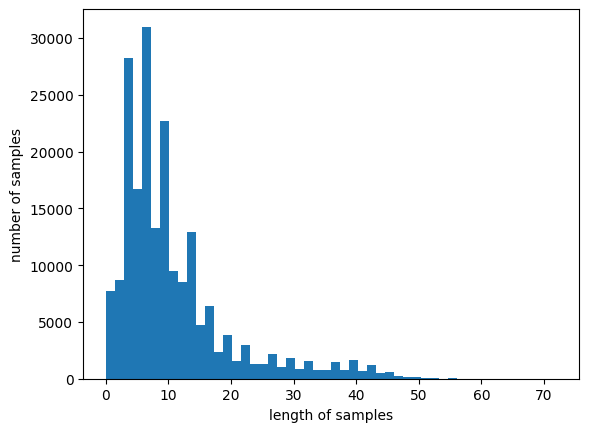

In [ ]:
print(max(len(sentence) for sentence in tokenized))
print(sum(map(len, tokenized)) / len(tokenized))

plt.hist([len(sentence) for sentence in tokenized], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec

w2v_navermovie_model = Word2Vec(sentences=tokenized, 
                            vector_size=100, 
                            window=5, 
                            min_count=5, 
                            workers=4, 
                            sg=0)

6 sec

In [ ]:
w2v_navermovie_model.wv.vectors.shape

(16477, 100)

In [ ]:
w2v_navermovie_model.wv["최민식"]

array([-0.23123178,  0.14545394,  0.03510264,  0.06369918, -0.10993862,
       -0.24748947,  0.24968892, -0.07860713, -0.20101972, -0.2747807 ,
       -0.24466848,  0.09490803,  0.17452666,  0.24896644,  0.01558728,
       -0.1587233 ,  0.1171275 ,  0.0329524 , -0.16478437, -0.69643265,
        0.3061888 ,  0.01193692,  0.01953771,  0.07009057,  0.05229385,
       -0.32048464,  0.01500288, -0.08997075, -0.2190082 , -0.01387043,
        0.1463854 ,  0.5156417 ,  0.25287277,  0.23765048, -0.07554511,
        0.08065081,  0.18391635, -0.26765284, -0.18682705, -0.383731  ,
        0.26980284,  0.02124397, -0.00427602, -0.1011099 ,  0.20421508,
        0.14969356,  0.12264998, -0.1191045 ,  0.11895716,  0.29726022,
        0.03851037,  0.07626897, -0.16013224, -0.14521858,  0.07434811,
        0.0652753 , -0.04848064,  0.00463149, -0.4948437 ,  0.07658694,
        0.10893106,  0.0199811 ,  0.30458865, -0.02121161, -0.14469333,
        0.04833251,  0.05172517, -0.04935685, -0.05129834,  0.49

In [ ]:
w2v_navermovie_model.wv.most_similar("최민식")

[('최민수', 0.8513495326042175),
 ('이민호', 0.8474367260932922),
 ('한석규', 0.8402900099754333),
 ('이정재', 0.8376644849777222),
 ('안성기', 0.8350955843925476),
 ('송강호', 0.8278909921646118),
 ('박중훈', 0.8234529495239258),
 ('황정민', 0.8096263408660889),
 ('문소리', 0.8051713109016418),
 ('액션연기', 0.8043111562728882)]

### Pretrained Word2Vec, GoogleNews embedding vectors

In [ ]:
import gensim
import urllib.request

# urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", filename="GoogleNews-vectors-negative300.bin.gz")
# w2v_googlenews_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

# https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
w2v_googlenews_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/ColabFiles/yoonlp/GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
w2v_googlenews_model.vectors.shape

(3000000, 300)

In [ ]:
w2v_googlenews_model['book']

array([ 0.11279297, -0.02612305, -0.04492188,  0.06982422,  0.140625  ,
        0.03039551, -0.04370117,  0.24511719,  0.08740234, -0.05053711,
        0.23144531, -0.07470703,  0.21875   ,  0.03466797, -0.14550781,
        0.05761719,  0.00671387, -0.00701904,  0.13183594, -0.25390625,
        0.14355469, -0.140625  , -0.03564453, -0.21289062, -0.24804688,
        0.04980469, -0.09082031,  0.14453125,  0.05712891, -0.10400391,
       -0.19628906, -0.20507812, -0.27539062,  0.03063965,  0.20117188,
        0.17382812,  0.09130859, -0.10107422,  0.22851562, -0.04077148,
        0.02709961, -0.00106049,  0.02709961,  0.34179688, -0.13183594,
       -0.078125  ,  0.02197266, -0.18847656, -0.17480469, -0.05566406,
       -0.20898438,  0.04858398, -0.07617188, -0.15625   , -0.05419922,
        0.01672363, -0.02722168, -0.11132812, -0.03588867, -0.18359375,
        0.28710938,  0.01757812,  0.02185059, -0.05664062, -0.01251221,
        0.01708984, -0.21777344, -0.06787109,  0.04711914, -0.00

In [ ]:
print(w2v_googlenews_model.similarity('this', 'is'))
print(w2v_googlenews_model.similarity('post', 'book'))

0.40797034
0.057204384


## 09-08

### Binary classification using single FC layer, flattened embedding vectors as an input to the FC layer, index encoding with trainable embedding layer versus pretrained Word2Vec embedding vectors, GoogleNews embedding vectors

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
tokenizer.word_index

{'nice': 1,
 'great': 2,
 'best': 3,
 'amazing': 4,
 'stop': 5,
 'lies': 6,
 'pitiful': 7,
 'nerd': 8,
 'excellent': 9,
 'work': 10,
 'supreme': 11,
 'quality': 12,
 'bad': 13,
 'highly': 14,
 'respectable': 15}

In [ ]:
X_encoded = tokenizer.texts_to_sequences(sentences)
X_encoded

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]

In [ ]:
max_len = max(len(l) for l in X_encoded)

X_train = pad_sequences(X_encoded, maxlen=max_len, padding='post')
print(X_train)

y_train = np.array(y_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

vocab_size = len(tokenizer.word_index) + 1 
embedding_dim = 4

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 6s - loss: 0.7092 - acc: 0.2857 - 6s/epoch - 6s/step
Epoch 2/100
1/1 - 0s - loss: 0.7075 - acc: 0.2857 - 7ms/epoch - 7ms/step
Epoch 3/100
1/1 - 0s - loss: 0.7058 - acc: 0.4286 - 6ms/epoch - 6ms/step
Epoch 4/100
1/1 - 0s - loss: 0.7041 - acc: 0.4286 - 6ms/epoch - 6ms/step
Epoch 5/100
1/1 - 0s - loss: 0.7024 - acc: 0.4286 - 6ms/epoch - 6ms/step
Epoch 6/100
1/1 - 0s - loss: 0.7008 - acc: 0.4286 - 6ms/epoch - 6ms/step
Epoch 7/100
1/1 - 0s - loss: 0.6991 - acc: 0.5714 - 6ms/epoch - 6ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6975 - acc: 0.5714 - 6ms/epoch - 6ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6958 - acc: 0.5714 - 6ms/epoch - 6ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6942 - acc: 0.5714 - 6ms/epoch - 6ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6925 - acc: 0.7143 - 6ms/epoch - 6ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6909 - acc: 0.7143 - 7ms/epoch - 7ms/step
Epoch 13/100
1/1 - 0s - loss: 0.6893 - acc: 0.7143 - 6ms/epoch - 6ms/step
Epoch 14/100
1/1 - 0s - loss: 0.6877 - acc: 0.714

- acc reached 1.0 at epoch 25.
- loss is 0.5 at epoch 100.

In [ ]:
import gensim

word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/ColabFiles/yoonlp/GoogleNews-vectors-negative300.bin', binary=True)
print(word2vec_model.vectors.shape)

(3000000, 300)


In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))

def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

for word, index in tokenizer.word_index.items():
    vector_value = get_vector(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value
    else:
        print("word not in embedding vocab")

print(word2vec_model['nice'])
print(embedding_matrix[tokenizer.word_index['nice']])

[ 0.15820312  0.10595703 -0.18945312  0.38671875  0.08349609 -0.26757812
  0.08349609  0.11328125 -0.10400391  0.17871094 -0.12353516 -0.22265625
 -0.01806641 -0.25390625  0.13183594  0.0859375   0.16113281  0.11083984
 -0.11083984 -0.0859375   0.0267334   0.34570312  0.15136719 -0.00415039
  0.10498047  0.04907227 -0.06982422  0.08642578  0.03198242 -0.02844238
 -0.15722656  0.11865234  0.36132812  0.00173187  0.05297852 -0.234375
  0.11767578  0.08642578 -0.01123047  0.25976562  0.28515625 -0.11669922
  0.38476562  0.07275391  0.01147461  0.03466797  0.18164062 -0.03955078
  0.04199219  0.01013184 -0.06054688  0.09765625  0.06689453  0.14648438
 -0.12011719  0.08447266 -0.06152344  0.06347656  0.3046875  -0.35546875
 -0.2890625   0.19628906 -0.33203125 -0.07128906  0.12792969  0.09619141
 -0.12158203 -0.08691406 -0.12890625  0.27734375  0.265625    0.1796875
  0.12695312  0.06298828 -0.34375    -0.05908203  0.0456543   0.171875
  0.08935547  0.14648438 -0.04638672 -0.00842285 -0.0279

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input

model = Sequential()
model.add(Input(shape=(max_len,), dtype='int32'))
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.6787 - acc: 0.5714 - 744ms/epoch - 744ms/step
Epoch 2/100
1/1 - 0s - loss: 0.6613 - acc: 0.7143 - 5ms/epoch - 5ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6444 - acc: 0.7143 - 5ms/epoch - 5ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6280 - acc: 0.7143 - 5ms/epoch - 5ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6122 - acc: 0.7143 - 5ms/epoch - 5ms/step
Epoch 6/100
1/1 - 0s - loss: 0.5968 - acc: 0.8571 - 5ms/epoch - 5ms/step
Epoch 7/100
1/1 - 0s - loss: 0.5818 - acc: 0.8571 - 5ms/epoch - 5ms/step
Epoch 8/100
1/1 - 0s - loss: 0.5674 - acc: 0.8571 - 5ms/epoch - 5ms/step
Epoch 9/100
1/1 - 0s - loss: 0.5534 - acc: 0.8571 - 6ms/epoch - 6ms/step
Epoch 10/100
1/1 - 0s - loss: 0.5399 - acc: 0.8571 - 5ms/epoch - 5ms/step
Epoch 11/100
1/1 - 0s - loss: 0.5268 - acc: 0.8571 - 5ms/epoch - 5ms/step
Epoch 12/100
1/1 - 0s - loss: 0.5141 - acc: 0.8571 - 5ms/epoch - 5ms/step
Epoch 13/100
1/1 - 0s - loss: 0.5018 - acc: 1.0000 - 5ms/epoch - 5ms/step
Epoch 14/100
1/1 - 0s - loss: 0.4899 - acc:

- acc reached 1.0 at epoch 13, as opposed to 25.
- loss is 0.1, as opposed to 0.5, at epoch 100.

## 09-11

### Sentence cosine similarity search with simple average of embedding vectors, GoogleNews embedding vectors, books

In [ ]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re
from PIL import Image
from io import BytesIO
from nltk.tokenize import RegexpTokenizer
import nltk
import nltk
nltk.download('stopwords')
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/data.csv", filename="data.csv")
df = pd.read_csv("data.csv")
len(df)

2382

In [ ]:
df[:5]

,Unnamed: 0.1,Desc,Unnamed: 0,author,genre,image_link,rating,title
0,0,We know that power is shifting: From West to E...,0.0,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,3,William J. Bernstein is an American financial ...,3.0,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,4,Amazing book. And I joined Steve Jobs and many...,4.0,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


In [ ]:
def _removeNonAscii(s):
    return "".join(i for i in s if ord(i)<128)

def make_lower_case(text):
    return text.lower()

def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

df['cleaned'] = df['Desc'].apply(_removeNonAscii)
df['cleaned'] = df.cleaned.apply(make_lower_case)
df['cleaned'] = df.cleaned.apply(remove_stop_words)
df['cleaned'] = df.cleaned.apply(remove_punctuation)
df['cleaned'] = df.cleaned.apply(remove_html)

df['cleaned'][:5]

0    know power shifting west east north south pres...
1    following success accidental billionaires mone...
2    tap power social software networks build busin...
3    william j bernstein american financial theoris...
4    amazing book joined steve jobs many akio morit...
Name: cleaned, dtype: object

In [ ]:
df['cleaned'].replace('', np.nan, inplace=True)
df = df[df['cleaned'].notna()]
len(df)

2381

In [ ]:
corpus = []
for words in df['cleaned']:
    corpus.append(words.split())

In [ ]:
word2vec_model = Word2Vec(vector_size = 300, window=5, min_count = 2, workers = -1)
word2vec_model.build_vocab(corpus)
word2vec_model.wv.vectors_lockf = np.ones(len(word2vec_model.wv), dtype=np.float32)
word2vec_model.wv.intersect_word2vec_format('/content/drive/MyDrive/ColabFiles/yoonlp/GoogleNews-vectors-negative300.bin', binary=True)
word2vec_model.train(corpus, total_examples = word2vec_model.corpus_count, epochs = 15)

(0, 0)

In [ ]:
def get_document_vectors(document_list):
    document_embedding_list = []

    # for each doc
    for line in document_list:
        doc2vec = None
        count = 0

        # for each word
        for word in line.split():
            if word in word2vec_model.wv:
                count += 1
                if doc2vec is None:
                    doc2vec = word2vec_model.wv[word]
                else:
                    doc2vec = doc2vec + word2vec_model.wv[word]

        if doc2vec is not None:
            doc2vec = doc2vec / count
            document_embedding_list.append(doc2vec)

    return document_embedding_list

document_embedding_list = get_document_vectors(df['cleaned'])
len(document_embedding_list)

2381

In [ ]:
cosine_similarities = cosine_similarity(document_embedding_list, document_embedding_list)
cosine_similarities.shape

(2381, 2381)

1191
[(1286, 0.8832482), (1582, 0.8723697), (1437, 0.8645065), (1216, 0.86161566), (1944, 0.86043525)]


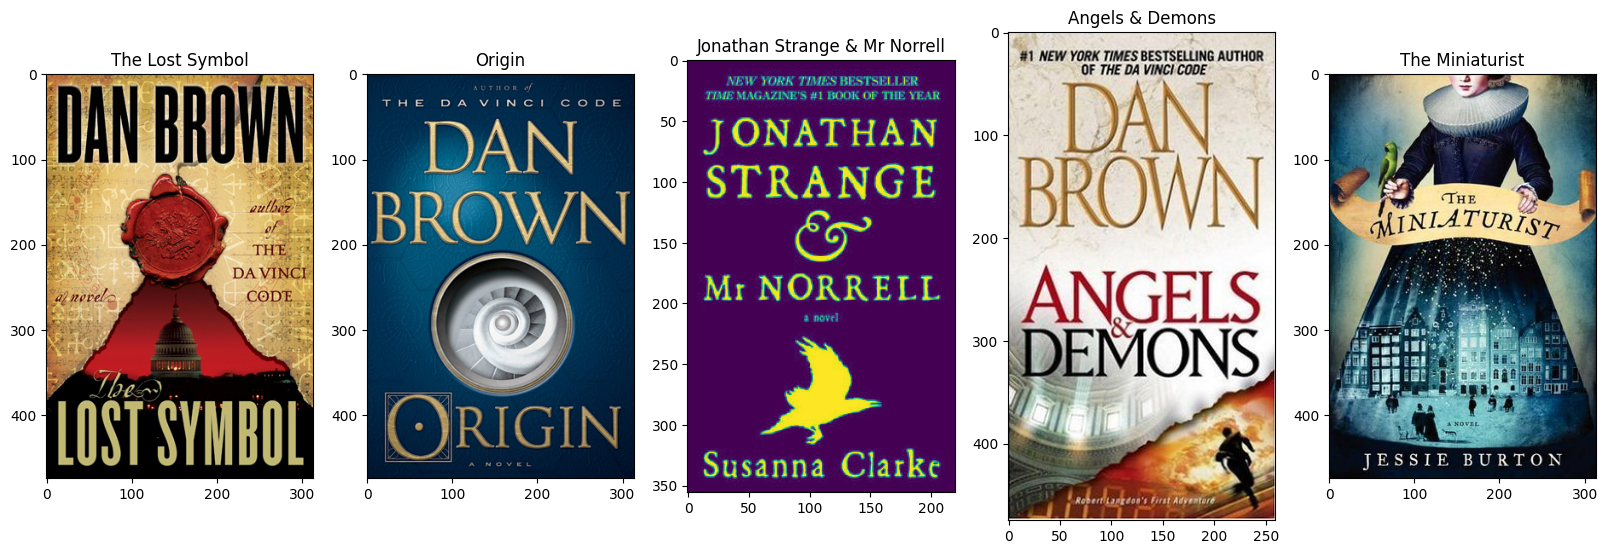

In [ ]:
def recommendations(title):
    books = df[['title', 'image_link']]

    indices = pd.Series(df.index, index = df['title']).drop_duplicates()    
    idx = indices[title]
    print(idx)

    # cosine similarities of every single books
    sim_scores = list(enumerate(cosine_similarities[idx]))
    # sorted
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    # first five except for itself
    sim_scores = sim_scores[1:6]
    print(sim_scores)

    book_indices = [i[0] for i in sim_scores]
    recommend = books.iloc[book_indices].reset_index(drop=True)

    fig = plt.figure(figsize=(20, 30))
    for index, row in recommend.iterrows():
        response = requests.get(row['image_link'])
        img = Image.open(BytesIO(response.content))
        fig.add_subplot(1, 5, index + 1)
        plt.imshow(img)
        plt.title(row['title'])

recommendations("The Da Vinci Code")

## 09-12

### Binary classification using single FC layer, simple average of embedding vectors as an input to the FC layer, index encoding with trainable embedding layer, IMDb

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 20000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

print(len(X_train))
print(len(X_test))

25000
25000


In [ ]:
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [ ]:
print(np.mean(list(map(len, X_train)), dtype=int))
print(np.mean(list(map(len, X_test)), dtype=int))

238
230


In [ ]:
max_len = 400
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print(X_train.shape)
print(X_test.shape)

(25000, 400)
(25000, 400)


In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 64

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))

# Simple average of Word2Vec embedding vectors
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('0912_embedding_average_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, batch_size=32, epochs=10, callbacks=[es, mc], validation_split=0.2)

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.6230 - acc: 0.7253
Epoch 1: val_acc improved from -inf to 0.81920, saving model to 0912_embedding_average_model.h5
625/625 [==============================] - 75s 117ms/step - loss: 0.6230 - acc: 0.7253 - val_loss: 0.5135 - val_acc: 0.8192
Epoch 2/10
623/625 [============================>.] - ETA: 0s - loss: 0.4237 - acc: 0.8593
Epoch 2: val_acc improved from 0.81920 to 0.86940, saving model to 0912_embedding_average_model.h5
625/625 [==============================] - 30s 47ms/step - loss: 0.4235 - acc: 0.8595 - val_loss: 0.3758 - val_acc: 0.8694
Epoch 3/10
615/625 [============================>.] - ETA: 0s - loss: 0.3156 - acc: 0.8929
Epoch 3: val_acc improved from 0.86940 to 0.88080, saving model to 0912_embedding_average_model.h5
625/625 [==============================] - 16s 26ms/step - loss: 0.3152 - acc: 0.8928 - val_loss: 0.3212 - val_acc: 0.8808
Epoch 4/10
607/625 [============================>.] - ETA: 0s -

2 min

In [ ]:
loaded_model = load_model('/content/drive/MyDrive/ColabFiles/yoonlp/0912_embedding_average_model.h5')
print(f"Test accuracy: {loaded_model.evaluate(X_test, y_test)[1]}")

782/782 [==============================] - 2s 2ms/step - loss: 0.2920 - acc: 0.8870
Test accuracy: 0.8869600296020508


## 09-14

### Train Word2Vec, 한국어위키

In [ ]:
import pandas as pd
import csv

In [ ]:
!pip install sentencepiece
import sentencepiece as spm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.5 MB/s eta 0:00:00


In [ ]:
f = open('/content/drive/MyDrive/ColabFiles/yoonlp/0914_kowiki_data.txt', encoding="utf8")
lines = f.read().splitlines()
len(lines)

10958675

In [ ]:
lines[:10]

['<doc id="5" url="https://ko.wikipedia.org/wiki?curid=5" title="지미 카터">',
 '지미 카터',
 '',
 '제임스 얼 카터 주니어(, 1924년 10월 1일~)는 민주당 출신 미국의 제39대 대통령(1977년~1981년) 이다.',
 '생애.',
 '어린 시절.',
 '지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다.',
 '조지아 공과대학교를 졸업하였다. 그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다. 1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다. 그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.',
 '정계 입문.',
 '1962년 조지아주 상원 의원 선거에서 낙선하였으나, 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주지사 선거에 낙선하지만, 1970년 조지아 주지사 선거에서 당선됐다. 대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다. 조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.']

In [ ]:
spm.SentencePieceTrainer.Train('--input=/content/drive/MyDrive/ColabFiles/yoonlp/0914_kowiki_data.txt --model_prefix=0914_w2v_kowiki --vocab_size=10000 --model_type=bpe --max_sentence_length=100')

In [ ]:
vocab_list = pd.read_csv('/content/drive/MyDrive/ColabFiles/yoonlp/0914_w2v_kowiki.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
print(len(vocab_list))
vocab_list.sample(10)

10000


,0,1
2441,"202""",-2438
6993,"=""2694",-6990
9150,괌,-9147
8752,맬,-8749
8043,련,-8040
5393,▁론,-5390
4889,ung,-4886
9160,랸,-9157
1922,▁희,-1919
447,▁애,-444


In [ ]:
sp = spm.SentencePieceProcessor()
vocab_file = "/content/drive/MyDrive/ColabFiles/yoonlp/0914_w2v_kowiki.model"
sp.load(vocab_file)

True

In [ ]:
for line in lines[:10]:
    # print(line)
    print(sp.encode_as_pieces(line))
    print(sp.encode_as_ids(line))

['▁<', 'doc', '▁id', '="', '5"', '▁url', '="', 'https', '://', 'ko', '.', 'wikipedia', '.', 'org', '/', 'wiki', '?', 'curid', '=', '5"', '▁title', '="', '지', '미', '▁카', '터', '">']
[6, 5, 30, 3, 46, 35, 3, 24, 22, 26, 7583, 33, 7583, 27, 7578, 11, 7607, 36, 7580, 46, 34, 3, 7625, 7649, 187, 7713, 37]
['▁지', '미', '▁카', '터']
[103, 7649, 187, 7713]
[]
[]
['▁제임스', '▁얼', '▁카', '터', '▁주니어', '(,', '▁19', '24', '년', '▁10', '월', '▁1', '일', '~)', '는', '▁민주', '당', '▁출신', '▁미국의', '▁제', '39', '대', '▁대통령', '(19', '77', '년', '~19', '81', '년', ')', '▁이다', '.']
[2088, 2578, 187, 7713, 5524, 529, 97, 92, 7623, 263, 7676, 116, 7637, 3453, 7627, 2285, 7807, 1965, 614, 94, 383, 7620, 1342, 608, 101, 7623, 3799, 1771, 7623, 7613, 1919, 7583]
['▁생애', '.']
[190, 7583]
['▁어린', '▁시절', '.']
[2625, 457, 7583]
['▁지', '미', '▁카', '터', '는', '▁조지', '아', '주', '▁섬', '터', '▁카운티', '▁플', '레인', '스', '▁마을', '에서', '▁태어났다', '.']
[103, 7649, 187, 7713, 7627, 1599, 7618, 7647, 778, 7713, 1068, 452, 1564, 7610, 4525, 133, 728, 758

In [ ]:
tokenized = []
for line in lines:
    if line:
        tokenized.append(sp.encode_as_pieces(line))
len(tokenized)

7401861

13 min

In [ ]:
from gensim.models import Word2Vec
w2v_kowiki_model = Word2Vec(tokenized, vector_size=100, window=5, min_count=5, workers=4, sg=0)

11 min

In [ ]:
type(w2v_kowiki_model)

gensim.models.word2vec.Word2Vec

In [ ]:
import pickle

In [ ]:
with open('/content/0914_w2v_kowiki_model.pkl', 'wb') as f:
    pickle.dump(w2v_kowiki_model, f, -1)

In [ ]:
files.download('/content/0914_w2v_kowiki_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
with open('/content/drive/MyDrive/ColabFiles/yoonlp/0914_w2v_kowiki_model.pkl', 'rb') as f:
    w2v_kowiki_model = pickle.load(f)

In [ ]:
type(w2v_kowiki_model)

gensim.models.word2vec.Word2Vec

In [ ]:
w2v_kowiki_model.wv.vectors.shape

(21571, 100)

In [ ]:
w2v_kowiki_model.wv["▁미국"]

array([ 1.6523789e+00, -2.5923699e-01,  2.4277055e+00,  3.0187199e-01,
       -1.2872981e+00, -2.8212705e+00, -2.7452299e-01,  1.0398500e+00,
       -5.1916039e-01,  3.2002161e+00,  2.0445673e+00, -4.8890948e+00,
        1.1371487e+00,  9.1312659e-01, -1.9301603e+00, -1.1590832e+00,
        3.9616439e+00, -4.8929241e-01, -9.6983212e-01, -4.1330643e+00,
        4.3681211e+00, -3.5532245e-01,  2.8964741e+00, -1.5519868e+00,
        3.8677478e-01, -2.1765058e+00,  8.3156368e-03, -3.1160395e+00,
        6.9815999e-01, -3.9881127e+00,  1.0809751e-03,  6.9389060e-02,
        5.0709686e+00, -7.7952594e-01,  1.2585628e+00,  8.3395548e-02,
        3.9027042e+00, -2.1462114e+00,  8.2791030e-01, -2.1263659e+00,
        4.2609053e+00,  9.5958424e-01, -2.4421780e+00,  2.6580648e+00,
       -8.7037593e-02, -8.5732371e-01,  1.1338397e+00, -2.8505711e-02,
       -2.7084918e+00, -4.7088847e+00, -2.2316144e-01,  2.2516062e+00,
       -1.7519054e+00,  1.2575704e-01,  1.4958919e+00,  1.0856861e+00,
      

In [ ]:
w2v_kowiki_model.wv.most_similar("▁미국")

[('▁영국', 0.8711657524108887),
 ('▁캐나다', 0.8347206711769104),
 ('▁오스트레일리아', 0.7199016213417053),
 ('▁호주', 0.7070829272270203),
 ('▁독일', 0.6910054087638855),
 ('▁홍콩', 0.6902009844779968),
 ('▁아일랜드', 0.6829307675361633),
 ('▁대한민국', 0.6588533520698547),
 ('▁유럽', 0.6552059650421143),
 ('▁런던', 0.6530053615570068)]

In [ ]:
w2v_kowiki_model.wv.most_similar("▁전자")

[('▁기계', 0.730190634727478),
 ('▁전기', 0.7083567380905151),
 ('▁제어', 0.6722198724746704),
 ('▁컴퓨터', 0.6505517363548279),
 ('▁신호', 0.6484994292259216),
 ('▁자동', 0.6390612721443176),
 ('▁화학', 0.6386488080024719),
 ('▁통신', 0.6094397902488708),
 ('▁응용', 0.5992639064788818),
 ('▁의료', 0.5990405082702637)]

## 10-02

### RNN, binary classification, index encoding with trainable embedding layer, spam

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")

data = pd.read_csv('spam.csv', encoding='latin1')
len(data)

5572

In [ ]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

data['v1'] = data['v1'].replace(['ham','spam'],[0,1])

data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
data.isnull().values.any()

False

In [ ]:
data['v2'].nunique()

5169

In [ ]:
data.drop_duplicates(subset=['v2'], inplace=True)

len(data)

5169

<Axes: >

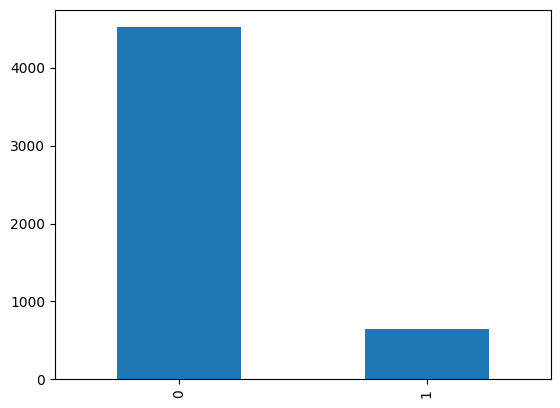

In [ ]:
data['v1'].value_counts().plot(kind='bar')

In [ ]:
data.groupby('v1').size().reset_index(name='count')

,v1,count
0,0,4516
1,1,653


In [ ]:
X_data = data['v2']
y_data = data['v1']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

print(len(X_train))
print(len(X_test))

print(f"{y_train.value_counts()[0]/len(y_train):.3f}")
print(f"{y_train.value_counts()[1]/len(y_train):.3f}")
print(f"{y_test.value_counts()[0]/len(y_test):.3f}")
print(f"{y_test.value_counts()[1]/len(y_test):.3f}")

4135
1034
0.874
0.126
0.873
0.127


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)

print(X_train_encoded[:5])

[[102, 1, 210, 230, 3, 17, 39], [1, 59, 8, 427, 17, 5, 137, 2, 2326], [157, 180, 12, 13, 98, 93, 47, 9, 40, 3485, 247, 8, 7, 87, 6, 80, 1312, 5, 3486, 7, 2327, 11, 660, 306, 20, 25, 467, 708, 1028, 203, 129, 193, 800, 2328, 23, 1, 144, 71, 2, 111, 78, 43, 2, 130, 11, 800, 186, 122, 1512], [1, 1154, 13, 104, 292], [222, 622, 857, 540, 623, 22, 23, 83, 10, 47, 6, 257, 32, 6, 26, 64, 936, 407]]


In [ ]:
word_to_index = tokenizer.word_index

for i, (k, v) in enumerate(word_to_index.items()):
    print(k, v)
    if i==10:
        break

i 1
to 2
you 3
a 4
the 5
u 6
and 7
in 8
is 9
me 10
my 11


In [ ]:
threshold = 2
rare_words = 0
total_freq = 0
rare_freq = 0
for word, word_count in tokenizer.word_counts.items():
    total_freq = total_freq + word_count

    if word_count < threshold:
        rare_words = rare_words + 1
        rare_freq = rare_freq + word_count

print(rare_words)
print(len(tokenizer.word_counts))

print(rare_words / len(tokenizer.word_counts))
print(rare_freq / total_freq)

4337
7821
0.5545326684567191
0.0665745644331875


In [ ]:
# To limit the number of words to be tokenized based on rarity:
# tokenizer = Tokenizer(num_words = len(tokenizer.word_counts) - rare_words + 1)

In [ ]:
# vocab_size = len(tokenizer.word_counts) + 1
vocab_size = len(word_to_index) + 1
vocab_size

7822

In [ ]:
print(max(len(sample) for sample in X_train_encoded))
print(sum(map(len, X_train_encoded)) / len(X_train_encoded))

189
15.75453446191052


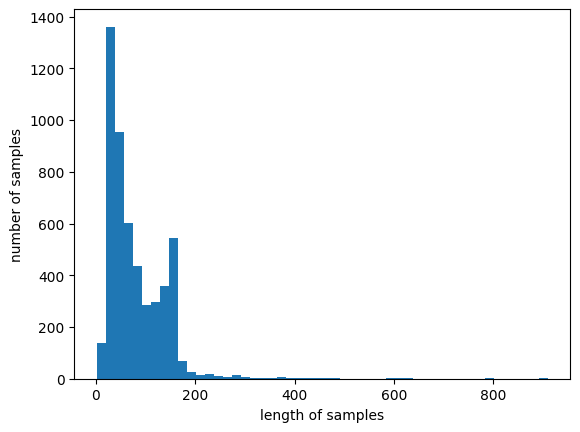

In [ ]:
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len = max(len(sample) for sample in X_train_encoded)
X_train_padded = pad_sequences(X_train_encoded, maxlen=max_len)
X_train_padded.shape

(4135, 189)

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
52/52 [==============================] - 14s 237ms/step - loss: 0.3395 - acc: 0.8903 - val_loss: 0.1945 - val_acc: 0.9601
Epoch 2/5
52/52 [==============================] - 10s 202ms/step - loss: 0.1277 - acc: 0.9661 - val_loss: 0.1211 - val_acc: 0.9649
Epoch 3/5
52/52 [==============================] - 10s 188ms/step - loss: 0.0772 - acc: 0.9800 - val_loss: 0.0916 - val_acc: 0.9722
Epoch 4/5
52/52 [==============================] - 9s 184ms/step - loss: 0.0457 - acc: 0.9891 - val_loss: 0.1292 - val_acc: 0.9613
Epoch 5/5
52/52 [==============================] - 9s 172ms/step - loss: 0.0377 - acc: 0.9906 - val_loss: 0.0760 - val_acc: 0.9807


In [ ]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)

model.evaluate(X_test_padded, y_test)[1]

33/33 [==============================] - 1s 17ms/step - loss: 0.0780 - acc: 0.9787


0.978723406791687

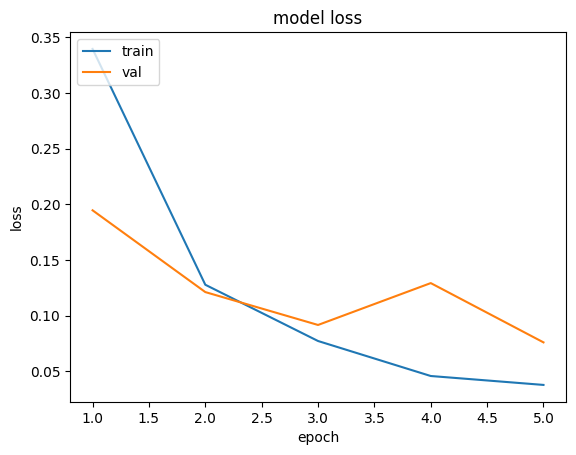

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## 10-03

### LSTM, multi-class classification, index encoding with trainable embedding layer, Reuters

*   List item
*   List item



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters

In [ ]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

print(len(X_train))
print(len(X_test))
num_classes = len(set(y_train))
print(num_classes)

2110848/2110848 [==============================] - 0s 0us/step
8982
2246
46


In [ ]:
print(X_train[0])
print(y_train[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


2376
145.5398574927633


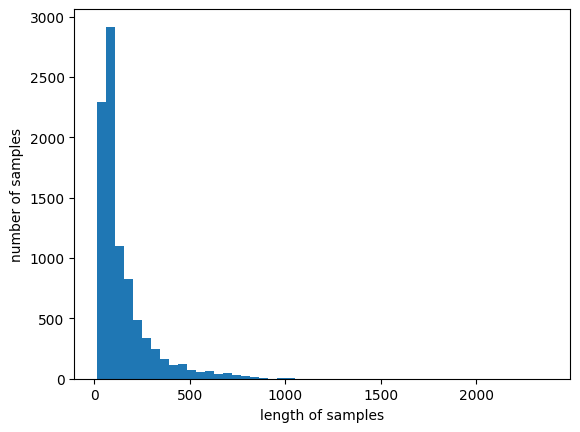

In [ ]:
print(max(len(sample) for sample in X_train))
print(sum(map(len, X_train)) / len(X_train))

plt.hist([len(sample) for sample in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

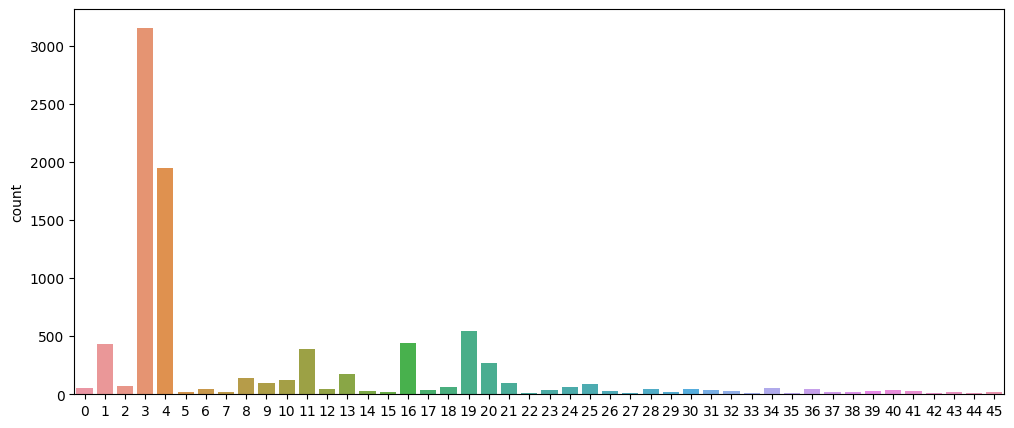

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(x=y_train)
plt.show()

In [ ]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
np.asarray((unique_elements, counts_elements))

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45],
       [  55,  432,   74, 3159, 1949,   17,   48,   16,  139,  101,  124,
         390,   49,  172,   26,   20,  444,   39,   66,  549,  269,  100,
          15,   41,   62,   92,   24,   15,   48,   19,   45,   39,   32,
          11,   50,   10,   49,   19,   19,   24,   36,   30,   13,   21,
          12,   18]])

In [ ]:
word_to_index = reuters.get_word_index()

sorted_word_to_index = sorted(word_to_index.items(), key=lambda x: x[1])
first_20 = sorted_word_to_index[:20]

for word, index in first_20:
    print(word, index)

the 1
of 2
to 3
in 4
said 5
and 6
a 7
mln 8
3 9
for 10
vs 11
dlrs 12
it 13
reuter 14
000 15
1 16
pct 17
on 18
from 19
is 20


In [ ]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

print(f"Most frequent word: {index_to_word[4]}")

Most frequent word: the


In [ ]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

In [ ]:
print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = 1000
max_len = 100

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
embedding_dim = 128
hidden_units = 128
num_classes = 46

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('1003_reuters_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(X_test, y_test))

Epoch 1/30
71/71 [==============================] - ETA: 0s - loss: 2.6072 - acc: 0.3473
Epoch 1: val_acc improved from -inf to 0.36198, saving model to 1003_reuters_model.h5
71/71 [==============================] - 10s 121ms/step - loss: 2.6072 - acc: 0.3473 - val_loss: 2.3836 - val_acc: 0.3620
Epoch 2/30
71/71 [==============================] - ETA: 0s - loss: 2.0950 - acc: 0.4653
Epoch 2: val_acc improved from 0.36198 to 0.49955, saving model to 1003_reuters_model.h5
71/71 [==============================] - 3s 50ms/step - loss: 2.0950 - acc: 0.4653 - val_loss: 2.0101 - val_acc: 0.4996
Epoch 3/30
71/71 [==============================] - ETA: 0s - loss: 1.8832 - acc: 0.5090
Epoch 3: val_acc improved from 0.49955 to 0.54809, saving model to 1003_reuters_model.h5
71/71 [==============================] - 2s 29ms/step - loss: 1.8832 - acc: 0.5090 - val_loss: 1.7883 - val_acc: 0.5481
Epoch 4/30
71/71 [==============================] - ETA: 0s - loss: 1.7427 - acc: 0.5463
Epoch 4: val_acc d

In [ ]:
loaded_model = load_model('/content/drive/MyDrive/ColabFiles/yoonlp/1003_reuters_model.h5')
loaded_model.evaluate(X_test, y_test)[1]

71/71 [==============================] - 1s 5ms/step - loss: 1.1862 - acc: 0.7244


0.7243989109992981

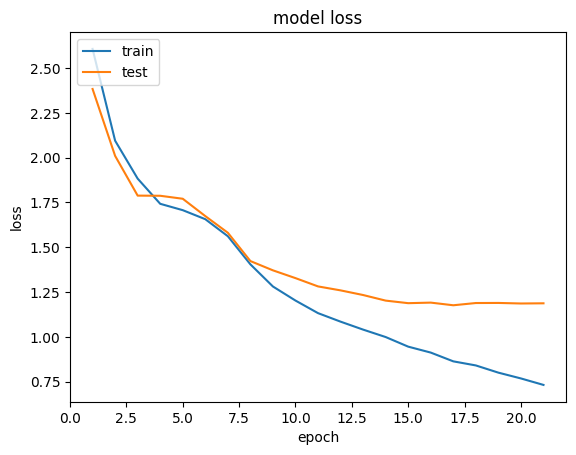

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 11-05

### Multi-kernel 1D CNN, binary classification, index encoding with trainable embedding layer, 네이버영화

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
!pip install konlpy
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 41.0 MB/s eta 0:00:00


In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7fcd33a95660>)

In [ ]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

print(len(train_data))
print(len(test_data))

150000
50000


In [ ]:
train_data[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
test_data[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
train_data['document'].nunique()

143682

In [ ]:
train_data['label'].nunique()

2

In [ ]:
train_data.drop_duplicates(subset=['document'], inplace=True)
len(train_data)

143682

<Axes: >

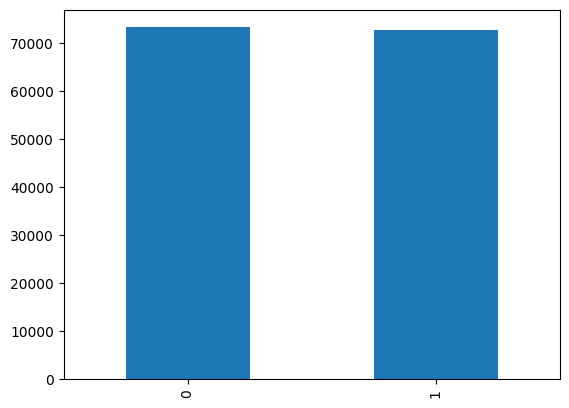

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')


In [ ]:
train_data.groupby('label').size().reset_index(name = 'count')

,label,count
0,0,73342
1,1,72841


In [ ]:
train_data.isnull().values.any()

True

In [ ]:
train_data.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [ ]:
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1


In [ ]:
train_data = train_data.dropna(how = 'any')

train_data.isnull().values.any()

False

In [ ]:
len(train_data)

146182

In [ ]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

<ipython-input-16-9c6253be230d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [ ]:
train_data['document'] = train_data['document'].str.replace('^ +', "")
train_data['document'].replace('', np.nan, inplace=True)

train_data.isnull().sum()

<ipython-input-25-146f12c5a17d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('^ +', "")


id           0
document    22
label        0
dtype: int64

In [ ]:
train_data.loc[train_data.document.isnull()][:5]

,id,document,label
404,4221289,NaN,0
470,10147571,NaN,1
584,7117896,NaN,0
1549,7246718,NaN,1
2295,8085032,NaN,1


In [ ]:
train_data = train_data.dropna(how = 'any')
len(train_data)

143660

In [ ]:
test_data.drop_duplicates(subset = ['document'], inplace=True) # drop duplicates
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # Korean only
test_data['document'] = test_data['document'].str.replace('^ +', "") # whitespace -> empty
test_data['document'].replace('', np.nan, inplace=True) # empty -> NaN
test_data = test_data.dropna(how='any') # drop NaN
len(test_data)

<ipython-input-29-c408128b2ab5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # Korean only
<ipython-input-29-c408128b2ab5>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('^ +', "") # whitespace -> empty


48852

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [ ]:
X_train = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    X_train.append(stopwords_removed_sentence)

X_train[:3]

100%|██████████| 143660/143660 [07:28<00:00, 320.24it/s]


[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]

In [ ]:
X_test = []
for sentence in tqdm(test_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    X_test.append(stopwords_removed_sentence)

X_test[:3]

100%|██████████| 48852/48852 [02:50<00:00, 285.78it/s]


[['굳다', 'ㅋ'],
 ['뭐', '야', '평점', '나쁘다', '않다', '점', '짜다', '리', '더', '더욱', '아니다'],
 ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는']]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
for i, (k, v) in enumerate(tokenizer.word_index.items()):
    print(k, v)
    if i==10:
        break

영화 1
보다 2
을 3
없다 4
이다 5
있다 6
좋다 7
너무 8
다 9
정말 10
되다 11


In [ ]:
threshold = 3
rare_words = 0
rare_freq = 0
total_freq = 0

for word, count in tokenizer.word_counts.items():
    total_freq = total_freq + count

    if count < threshold:
        rare_words = rare_words + 1
        rare_freq = rare_freq + count

print(rare_words)
print(rare_words / len(tokenizer.word_counts))
print(rare_freq / total_freq)

24340
0.5563174254891204
0.018757278609673574


In [ ]:
vocab_size = len(tokenizer.word_counts) - rare_words + 1 # 0th token for padding
vocab_size

19413

In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train[:3]

[[50, 455, 16, 262, 659],
 [947, 456, 41, 602, 1, 214, 1448, 24, 961, 676, 19],
 [385, 2442, 2312, 5666, 2, 221, 9]]

In [ ]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [ ]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [ ]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

143432
143432


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


69
10.920471024597022


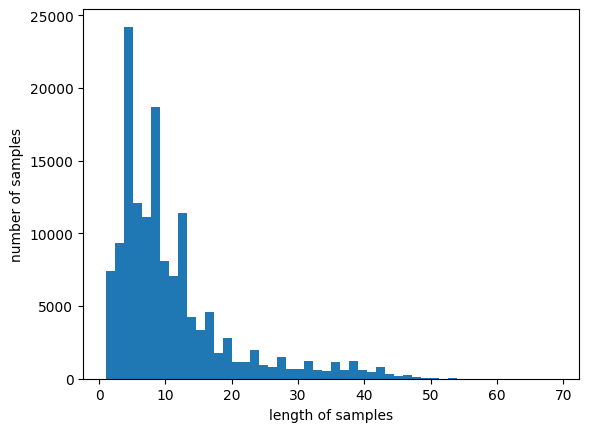

In [ ]:
print(max(len(review) for review in X_train))
print(sum(map(len, X_train)) / len(X_train))

plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if len(sentence) <= max_len:
            count = count + 1
    print(count / len(nested_list))

max_len = 30
below_threshold(max_len, X_train)

0.9425093424061576


In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

embedding_dim = 128
dropout_ratio = (0.5, 0.8)
num_filters = 128
hidden_units = 128

model_input = Input(shape = (max_len,))
z = Embedding(vocab_size, embedding_dim, input_length = max_len, name="embedding")(model_input)
z = Dropout(dropout_ratio[0])(z)

conv_blocks = []

for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)

z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_ratio[1])(z)
z = Dense(hidden_units, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('1105_MultiKernel1DCNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2, verbose=2, callbacks=[es, mc])

Epoch 1/10

Epoch 1: val_acc improved from -inf to 0.84164, saving model to 1105_MultiKernel1DCNN_model.h5
1793/1793 - 60s - loss: 0.4363 - acc: 0.7897 - val_loss: 0.3710 - val_acc: 0.8416 - 60s/epoch - 33ms/step
Epoch 2/10

Epoch 2: val_acc improved from 0.84164 to 0.84530, saving model to 1105_MultiKernel1DCNN_model.h5
1793/1793 - 13s - loss: 0.3488 - acc: 0.8500 - val_loss: 0.3606 - val_acc: 0.8453 - 13s/epoch - 7ms/step
Epoch 3/10

Epoch 3: val_acc did not improve from 0.84530
1793/1793 - 10s - loss: 0.3164 - acc: 0.8672 - val_loss: 0.3594 - val_acc: 0.8453 - 10s/epoch - 6ms/step
Epoch 4/10

Epoch 4: val_acc improved from 0.84530 to 0.84638, saving model to 1105_MultiKernel1DCNN_model.h5
1793/1793 - 10s - loss: 0.2911 - acc: 0.8787 - val_loss: 0.3591 - val_acc: 0.8464 - 10s/epoch - 6ms/step
Epoch 5/10

Epoch 5: val_acc did not improve from 0.84638
1793/1793 - 10s - loss: 0.2709 - acc: 0.8894 - val_loss: 0.3663 - val_acc: 0.8434 - 10s/epoch - 5ms/step
Epoch 6/10

Epoch 6: val_acc di

In [ ]:
loaded_model = load_model('/content/drive/MyDrive/ColabFiles/yoonlp/1105_MultiKernel1DCNN_model.h5')
loaded_model.evaluate(X_test, y_test)[1]

1527/1527 [==============================] - 4s 3ms/step - loss: 0.3639 - acc: 0.8421


0.8420740365982056

## 11-06

### Multi-kernel 1D CNN, multi-class classification, pretrained GloVe embedding vectors, intent

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from sklearn import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/11.%201D%20CNN%20Text%20Classification/dataset/intent_train_data.csv", filename="intent_train_data.csv")
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/11.%201D%20CNN%20Text%20Classification/dataset/intent_test_data.csv", filename="intent_test_data.csv")

train_data = pd.read_csv('intent_train_data.csv')
test_data = pd.read_csv('intent_test_data.csv')

In [ ]:
train_data

,intent,label
0,add another song to the cita rom ntica playlist,AddToPlaylist
1,add clem burke in my playlist pre party r b jams,AddToPlaylist
2,add live from aragon ballroom to trapeo,AddToPlaylist
3,add unite and win to my night out,AddToPlaylist
4,add track to my digster future hits,AddToPlaylist
...,...,...
11779,can a i get the movie schedule for sympathy fo...,SearchScreeningEvent
11780,find movie schedules for animated movies aroun...,SearchScreeningEvent
11781,what time is bordertown trail showing,SearchScreeningEvent
11782,in the neighbourhood find movies with movie times,SearchScreeningEvent


In [ ]:
test_data

,intent,label
0,i 'd like to have this track onto my classical...,AddToPlaylist
1,add the album to my flow espa ol playlist,AddToPlaylist
2,add digging now to my young at heart playlist,AddToPlaylist
3,add this song by too poetic to my piano ballad...,AddToPlaylist
4,add this album to old school death metal,AddToPlaylist
...,...,...
595,is any cinema playing the spirit of youth,SearchScreeningEvent
596,what are the movie times for animated movies i...,SearchScreeningEvent
597,what 's the movie schedule at great escape the...,SearchScreeningEvent
598,show the times for cheers for miss bishop at d...,SearchScreeningEvent


In [ ]:
intent_train = train_data['intent'].tolist()
label_train = train_data['label'].tolist()
intent_test = test_data['intent'].tolist()
label_test = test_data['label'].tolist()

print(len(intent_train))
print(len(label_train))
print(len(intent_test))
print(len(intent_test))

11784
11784
600
600


In [ ]:
print(intent_train[:5])
print(label_train[:5])

['add another song to the cita rom ntica playlist', 'add clem burke in my playlist pre party r b jams', 'add live from aragon ballroom to trapeo', 'add unite and win to my night out', 'add track to my digster future hits']
['AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist', 'AddToPlaylist']


In [ ]:
print(intent_train[2000:2002])
print(label_train[2000:2002])

['please book reservations for 3 people at a restaurant in alderwood manor', 'book a table in mt for 3 for now at a pub that serves south indian']
['BookRestaurant', 'BookRestaurant']


In [ ]:
print(intent_train[4000:4002])
print(label_train[4000:4002])

['what will the weather be like on feb 8 , 2034 in cedar mountain wilderness', "tell me the forecast in the same area here on robert e lee 's birthday"]
['GetWeather', 'GetWeather']


In [ ]:
print(intent_train[6000:6002])
print(label_train[6000:6002])

['rate the current album one points', 'i give a zero rating for this essay']
['RateBook', 'RateBook']


In [ ]:
print(intent_train[8000:8002])
print(label_train[8000:8002])

["i'm trying to find the show chant ii", 'find spirit of the bush']
['SearchCreativeWork', 'SearchCreativeWork']


In [ ]:
print(intent_train[10000:10002])
print(label_train[10000:10002])

['when is blood and ice cream trilogie playing at the nearest movie theatre \\?', 'show movie schedules']
['SearchScreeningEvent', 'SearchScreeningEvent']


<Axes: >

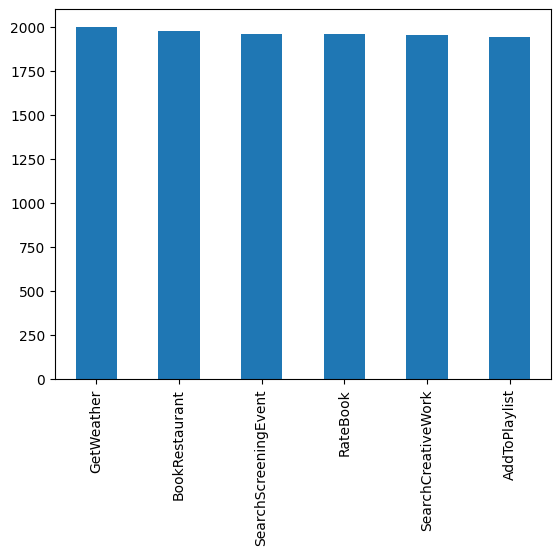

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
idx_encode = preprocessing.LabelEncoder()
idx_encode.fit(label_train)

label_train = idx_encode.transform(label_train) # index encoding
label_test = idx_encode.transform(label_test) # index encoding

label_idx = dict(zip(list(idx_encode.classes_), idx_encode.transform(list(idx_encode.classes_))))
label_idx

{'AddToPlaylist': 0,
 'BookRestaurant': 1,
 'GetWeather': 2,
 'RateBook': 3,
 'SearchCreativeWork': 4,
 'SearchScreeningEvent': 5}

In [ ]:
print(intent_train[:5])
print(label_train[:5])

['add another song to the cita rom ntica playlist', 'add clem burke in my playlist pre party r b jams', 'add live from aragon ballroom to trapeo', 'add unite and win to my night out', 'add track to my digster future hits']
[0 0 0 0 0]


In [ ]:
print(intent_test[:5])
print(label_test[:5])

["i 'd like to have this track onto my classical relaxations playlist", 'add the album to my flow espa ol playlist', 'add digging now to my young at heart playlist', 'add this song by too poetic to my piano ballads playlist', 'add this album to old school death metal']
[0 0 0 0 0]


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(intent_train)
sequences = tokenizer.texts_to_sequences(intent_train)
sequences[:5]

[[11, 191, 61, 4, 1, 4013, 1141, 1572, 15],
 [11, 2624, 1573, 3, 14, 15, 939, 82, 256, 188, 548],
 [11, 187, 42, 2625, 4014, 4, 1968],
 [11, 2626, 22, 2627, 4, 14, 192, 27],
 [11, 92, 4, 14, 651, 520, 195]]

In [ ]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
vocab_size

9870

35
9.364392396469789


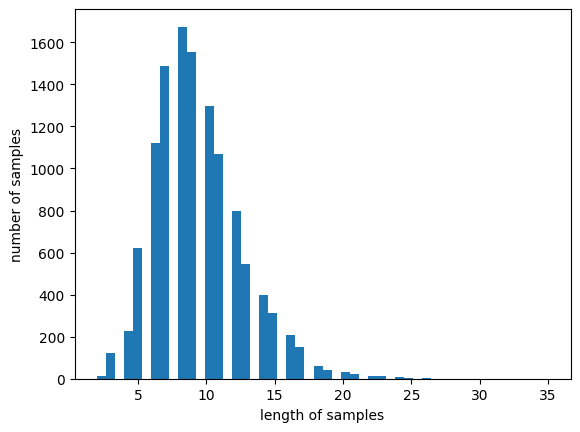

In [ ]:
print(max(len(l) for l in sequences))
print(sum(map(len, sequences)) / len(sequences))

plt.hist([len(s) for s in sequences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_len = 35

intent_train = pad_sequences(sequences, maxlen = max_len)
label_train = to_categorical(np.asarray(label_train))
print(intent_train.shape)
print(label_train.shape)

(11784, 35)
(11784, 6)


In [ ]:
print(intent_train[0])
print(label_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   11  191
   61    4    1 4013 1141 1572   15]
[1. 0. 0. 0. 0. 0.]


In [ ]:
indices = np.arange(intent_train.shape[0])
np.random.shuffle(indices)
print(indices)

[ 4887  9803  1016 ...  8212  6852 10294]


In [ ]:
intent_train = intent_train[indices]
label_train = label_train[indices]

In [ ]:
n_of_val = int(0.1 * intent_train.shape[0])
n_of_val

1178

In [ ]:
X_train = intent_train[:-n_of_val]
y_train = label_train[:-n_of_val]
X_val = intent_train[-n_of_val:]
y_val = label_train[-n_of_val:]
X_test = intent_test
y_test = label_test

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(len(X_test))
print(len(y_test))

(10606, 35)
(10606, 6)
(1178, 35)
(1178, 6)
600
600


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2023-06-04 14:31:36--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-06-04 14:31:36--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-06-04 14:31:37--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
embedding_dict = dict()
f = open(os.path.join('glove.6B.100d.txt'), encoding='utf-8')
for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr
f.close()

len(embedding_dict)

400000

In [ ]:
print(len(embedding_dict['respectable']))
print(embedding_dict['respectable'])

100
[-0.049773   0.19903    0.10585    0.1391    -0.32395    0.44053
  0.3947    -0.22805   -0.25793    0.49768    0.15384   -0.08831
  0.0782    -0.8299    -0.037788   0.16772   -0.45197   -0.17085
  0.74756    0.98256    0.81872    0.28507    0.16178   -0.48626
 -0.006265  -0.92469   -0.30625   -0.067318  -0.046762  -0.76291
 -0.0025264 -0.018795   0.12882   -0.52457    0.3586     0.43119
 -0.89477   -0.057421  -0.53724    0.25587    0.55195    0.44698
 -0.24252    0.29946    0.25776   -0.8717     0.68426   -0.05688
 -0.1848    -0.59352   -0.11227   -0.57692   -0.013593   0.18488
 -0.32507   -0.90171    0.17672    0.075601   0.54896   -0.21488
 -0.54018   -0.45882   -0.79536    0.26331    0.18879   -0.16363
  0.3975     0.1099     0.1164    -0.083499   0.50159    0.35802
  0.25677    0.088546   0.42108    0.28674   -0.71285   -0.82915
  0.15297   -0.82712    0.022112   1.067     -0.31776    0.1211
 -0.069755  -0.61327    0.27308   -0.42638   -0.085084  -0.17694
 -0.0090944  0.1109   

In [ ]:
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

np.shape(embedding_matrix)

(9870, 100)

In [ ]:
for word, i in word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate

kernel_sizes = [2, 3, 5]
num_filters = 512
dropout_ratio = 0.5

model_input = Input(shape=(max_len,))
output = Embedding(vocab_size, 
                   embedding_dim, 
                   weights=[embedding_matrix], # pretrained embedding vectors
                   input_length=max_len, 
                   trainable=False)(model_input)

conv_blocks = []
for size in kernel_sizes:
    conv = Conv1D(filters=num_filters,
                         kernel_size=size,
                         padding="valid",
                         activation="relu",
                         strides=1)(output)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)

output = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
output = Dropout(dropout_ratio)(output)
model_output = Dense(len(label_idx), activation='softmax')(output)
model = Model(model_input, model_output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 35)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 35, 100)      987000      ['input_3[0][0]']                
                                                                                                  
 conv1d_3 (Conv1D)              (None, 34, 512)      102912      ['embedding[0][0]']              
                                                                                                  
 conv1d_4 (Conv1D)              (None, 33, 512)      154112      ['embedding[0][0]']              
                                                                                            

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('1106_MultiKernel1DCNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train,
          batch_size=64,
          epochs=10,
          validation_data=(X_val, y_val),
          callbacks=[es, mc])

Epoch 1/10
166/166 [==============================] - ETA: 0s - loss: 0.1947 - acc: 0.9390
Epoch 1: val_acc improved from -inf to 0.98642, saving model to 1106_MultiKernel1DCNN_model.h5
166/166 [==============================] - 2s 10ms/step - loss: 0.1947 - acc: 0.9390 - val_loss: 0.0590 - val_acc: 0.9864
Epoch 2/10
159/166 [===========================>..] - ETA: 0s - loss: 0.0473 - acc: 0.9871
Epoch 2: val_acc improved from 0.98642 to 0.98896, saving model to 1106_MultiKernel1DCNN_model.h5
166/166 [==============================] - 1s 6ms/step - loss: 0.0480 - acc: 0.9871 - val_loss: 0.0489 - val_acc: 0.9890
Epoch 3/10
159/166 [===========================>..] - ETA: 0s - loss: 0.0276 - acc: 0.9933
Epoch 3: val_acc improved from 0.98896 to 0.98981, saving model to 1106_MultiKernel1DCNN_model.h5
166/166 [==============================] - 1s 6ms/step - loss: 0.0282 - acc: 0.9932 - val_loss: 0.0401 - val_acc: 0.9898
Epoch 4/10
164/166 [============================>.] - ETA: 0s - loss: 0.

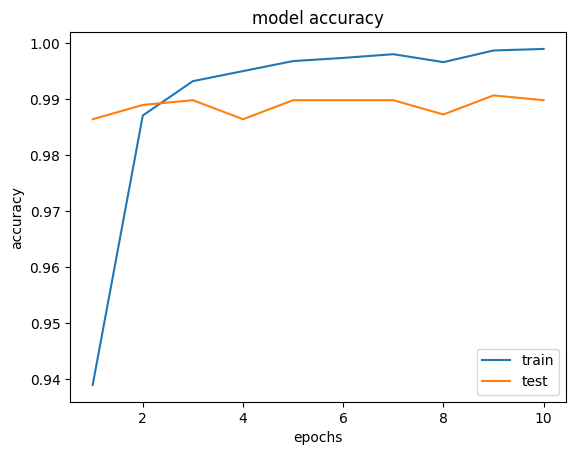

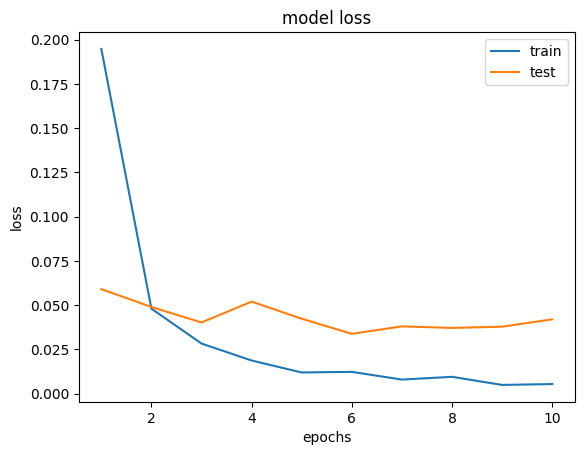

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
loaded_model = load_model('/content/drive/MyDrive/ColabFiles/yoonlp/1106_MultiKernel1DCNN_model.h5')

In [ ]:
y_predicted = loaded_model.predict(X_test)
y_predicted = y_predicted.argmax(axis=-1)

19/19 [==============================] - 0s 2ms/step


In [ ]:
print(sum(y_predicted == y_test) / len(y_test))

0.9916666666666667


## 13-02

### SentencePiece, IMDb

In [2]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.5 MB/s eta 0:00:00


In [3]:
import sentencepiece as spm
import pandas as pd
import urllib.request
import csv

In [4]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

('IMDb_Reviews.csv', <http.client.HTTPMessage at 0x7fda3b6258d0>)

In [5]:
train_df = pd.read_csv('IMDb_Reviews.csv')
train_df['review'][:5]

0    My family and I normally do not watch local mo...
1    Believe it or not, this was at one time the wo...
2    After some internet surfing, I found the "Home...
3    One of the most unheralded great works of anim...
4    It was the Sixties, and anyone with long hair ...
Name: review, dtype: object

In [6]:
len(train_df)

50000

In [7]:
with open('1302_imdb_data.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(train_df['review']))

In [9]:
spm.SentencePieceTrainer.Train('--input=1302_imdb_data.txt --model_prefix=1302_imdb --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')

In [11]:
vocab_list = pd.read_csv('1302_imdb.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list.sample(10)

,0,1
1998,▁fill,-1995
1066,gether,-1063
2843,cent,-2840
2885,▁step,-2882
1399,ger,-1396
4662,▁capture,-4659
2928,▁uses,-2925
2196,▁visual,-2193
590,▁lot,-587
4182,ovies,-4179


In [13]:
len(vocab_list)

5000

In [14]:
sp = spm.SentencePieceProcessor()
vocab_file = "1302_imdb.model"
sp.load(vocab_file)

True

In [16]:
lines = [
    "I didn't at all think of it this way.",
    "I have waited a long time for someone to film"
]
for line in lines:
    print(line)
    print(sp.encode_as_pieces(line))
    print(sp.encode_as_ids(line))
    print()

I didn't at all think of it this way.
['▁I', '▁didn', "'", 't', '▁at', '▁all', '▁think', '▁of', '▁it', '▁this', '▁way', '.']
[41, 624, 4950, 4926, 139, 170, 378, 30, 58, 73, 413, 4945]

I have waited a long time for someone to film
['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 142, 1364, 1121, 4, 668, 285, 93, 1079, 33, 91]



In [17]:
sp.GetPieceSize()

5000

In [18]:
sp.IdToPiece(430)

'▁character'

In [19]:
sp.PieceToId('▁character')

430

In [20]:
sp.DecodeIds([41, 141, 1364, 1120, 4, 666, 285, 92, 1078, 33, 91])

'Iul wa fall aold timeooland to film'

In [21]:
sp.DecodePieces(['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film'])

'I have waited a long time for someone to film'

In [22]:
print(sp.encode('I have waited a long time for someone to film', out_type=str))
print(sp.encode('I have waited a long time for someone to film', out_type=int))

['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 142, 1364, 1121, 4, 668, 285, 93, 1079, 33, 91]


### SentencePiece, 네이버영화

In [23]:
import pandas as pd
import sentencepiece as spm
import urllib.request
import csv

In [24]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fda310d33d0>)

In [25]:
naver_df = pd.read_table('ratings.txt')
naver_df[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [26]:
len(naver_df)

200000

In [27]:
print(naver_df.isnull().values.any())

True


In [28]:
naver_df = naver_df.dropna(how = 'any')
naver_df.isnull().values.any()

False

In [29]:
len(naver_df)

199992

In [30]:
with open('1302_navermovie_data.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(naver_df['document']))

In [31]:
spm.SentencePieceTrainer.Train('--input=1302_navermovie_data.txt --model_prefix=1302_navermovie --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')

In [32]:
vocab_list = pd.read_csv('1302_navermovie.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list[:10]

,0,1
0,<unk>,0
1,<s>,0
2,</s>,0
3,..,0
4,영화,-1
5,▁영화,-2
6,▁이,-3
7,▁아,-4
8,...,-5
9,ᄏᄏ,-6


In [33]:
vocab_list.sample(10)

,0,1
727,이상,-724
3719,블,-3716
3188,▁청소년,-3185
3487,냐,-3484
945,▁낚,-942
336,▁마음,-333
1527,▁어쩌,-1524
4261,딧,-4258
555,▁봤다,-552
4280,ᅵ,-4277


In [34]:
len(vocab_list)

5000

In [35]:
sp = spm.SentencePieceProcessor()
vocab_file = "1302_navermovie.model"
sp.load(vocab_file)

True

In [36]:
lines = [
    "뭐 이딴 것도 영화냐.",
    "진짜 최고의 영화입니다 ㅋㅋ",
]
for line in lines:
    print(line)
    print(sp.encode_as_pieces(line))
    print(sp.encode_as_ids(line))
    print()

뭐 이딴 것도 영화냐.
['▁뭐', '▁이딴', '▁것도', '▁영화냐', '.']
[136, 970, 1299, 2593, 3276]

진짜 최고의 영화입니다 ㅋㅋ
['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ']
[54, 204, 825, 121]



In [37]:
sp.GetPieceSize()

5000

In [38]:
sp.IdToPiece(4)

'영화'

In [39]:
sp.PieceToId('영화')

4

In [40]:
sp.DecodeIds([54, 200, 821, 85])

'진짜 원 산~~'

In [41]:
sp.DecodePieces(['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ'])

'진짜 최고의 영화입니다 ᄏᄏ'

In [42]:
print(sp.encode('진짜 최고의 영화입니다 ㅋㅋ', out_type=str))
print(sp.encode('진짜 최고의 영화입니다 ㅋㅋ', out_type=int))

['▁진짜', '▁최고의', '▁영화입니다', '▁ᄏᄏ']
[54, 204, 825, 121]


## 16-03

### Transformer, multi-class classification, index encoding with trainable embedding layer, IMDb

In [43]:
import tensorflow as tf

In [44]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads=8):
        super(MultiHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim # d_model
        self.num_heads = num_heads

        assert embedding_dim % self.num_heads == 0

        self.projection_dim = embedding_dim // num_heads
        self.query_dense = tf.keras.layers.Dense(embedding_dim)
        self.key_dense = tf.keras.layers.Dense(embedding_dim)
        self.value_dense = tf.keras.layers.Dense(embedding_dim)
        self.dense = tf.keras.layers.Dense(embedding_dim)

    def scaled_dot_product_attention(self, query, key, value):
        matmul_qk = tf.matmul(query, key, transpose_b=True)
        depth = tf.cast(tf.shape(key)[-1], tf.float32)
        logits = matmul_qk / tf.math.sqrt(depth)
        attention_weights = tf.nn.softmax(logits, axis=-1)
        output = tf.matmul(attention_weights, value)
        return output, attention_weights

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]

        # (batch_size, seq_len, embedding_dim)
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)

        # (batch_size, num_heads, seq_len, projection_dim)
        query = self.split_heads(query, batch_size)  
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        scaled_attention, _ = self.scaled_dot_product_attention(query, key, value)
        # (batch_size, seq_len, num_heads, projection_dim)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  

        # (batch_size, seq_len, embedding_dim)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.embedding_dim))
        outputs = self.dense(concat_attention)
        return outputs

In [45]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(embedding_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dense(embedding_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs) # MultiHeadAttention
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) # Add & Norm
        ffn_output = self.ffn(out1) # Position-wise Feed Forward
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output) # Add & Norm

In [46]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, max_len, vocab_size, embedding_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.pos_emb = tf.keras.layers.Embedding(max_len, embedding_dim)

    def call(self, x):
        max_len = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=max_len, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [47]:
vocab_size = 20000
max_len = 200

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)
print(len(X_train))
print(len(X_test))

17464789/17464789 [==============================] - 1s 0us/step
25000
25000


In [48]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

In [49]:
embedding_dim = 32
num_heads = 2 # Number of attention heads
dff = 32 # Size of hidden layer to the position-wise feed forward layer

inputs = tf.keras.layers.Input(shape=(max_len,))
embedding_layer = TokenAndPositionEmbedding(max_len, vocab_size, embedding_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embedding_dim, num_heads, dff)
x = transformer_block(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(20, activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [50]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
782/782 [==============================] - 81s 91ms/step - loss: 0.3858 - accuracy: 0.8184 - val_loss: 0.3676 - val_accuracy: 0.8424
Epoch 2/2
782/782 [==============================] - 24s 30ms/step - loss: 0.2044 - accuracy: 0.9215 - val_loss: 0.3441 - val_accuracy: 0.8628


In [51]:
model.evaluate(X_test, y_test)[1]

782/782 [==============================] - 4s 5ms/step - loss: 0.3441 - accuracy: 0.8628


0.8628000020980835